## Section 1:

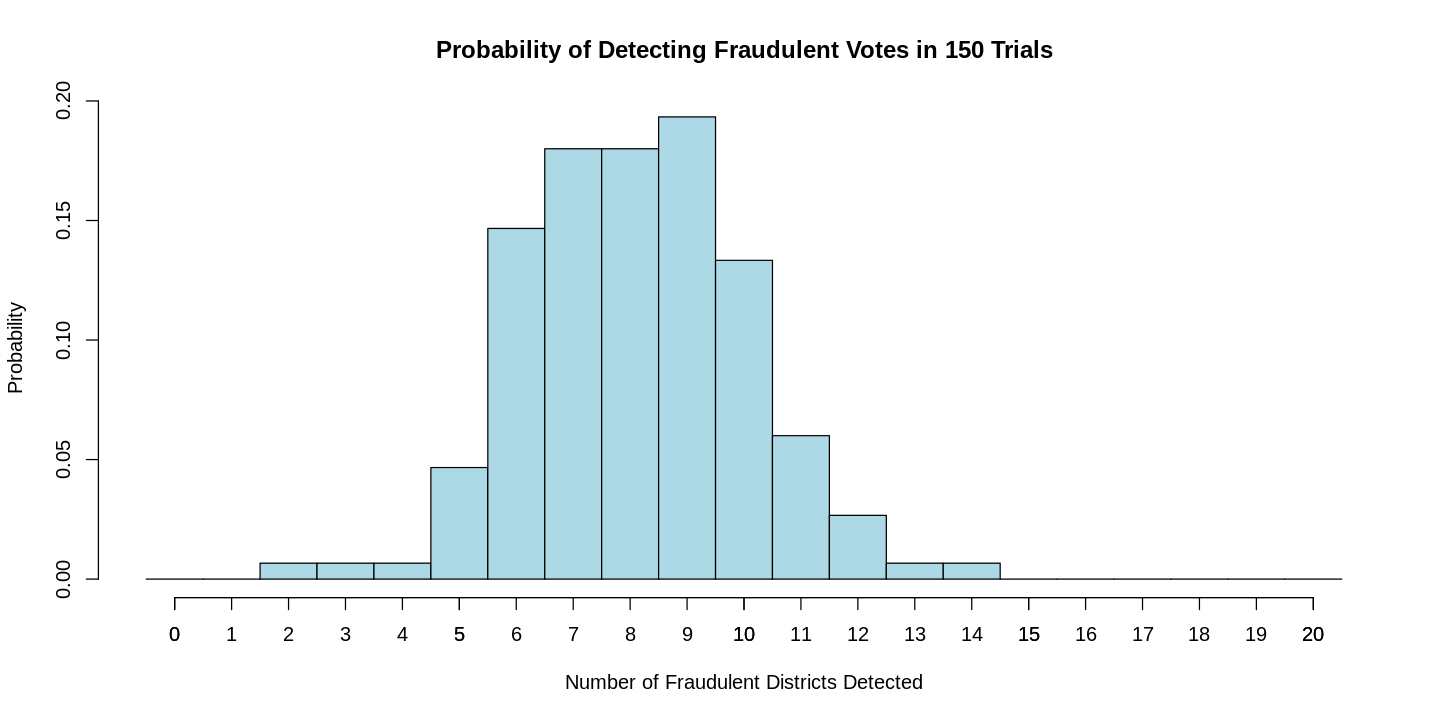

In [2]:
set.seed(501)
options(repr.plot.width = 12, repr.plot.height = 6)

N <- 100
K <- 20
m <- 40
n <- 150

samples <- rhyper(nn = n, m = K, n = N - K, k = m)

hist(samples, breaks = seq(-0.5, 20.5, by = 1),
     main = "Probability of Detecting Fraudulent Votes in 150 Trials",
     xlab = "Number of Fraudulent Districts Detected", col = "lightblue",
     probability = TRUE, ylab = "Probability")
axis(1, at = 0:20)

## Section 2:

In [3]:
N <- 100
K <- 20
m <- 40

theoretical_mean <- m * (K / N)
theoretical_variance <- m * (K / N) * ((N - K) / N) * ((N - m) / (N - 1))

sample_trials <- seq(100, 10000, by = 50)
simulated_means <- numeric(length(sample_trials))
simulated_variances <- numeric(length(sample_trials))

for (i in seq_along(sample_trials)) {
  t <- sample_trials[i]
  frauds_per_trial <- rhyper(nn = t, m = K, n = N - K, k = m)
  simulated_means[i] <- mean(frauds_per_trial)
  simulated_variances[i] <- var(frauds_per_trial)
}

## Section 3:

Theoretical mean: 8 
Theoretical variance: 3.878788 



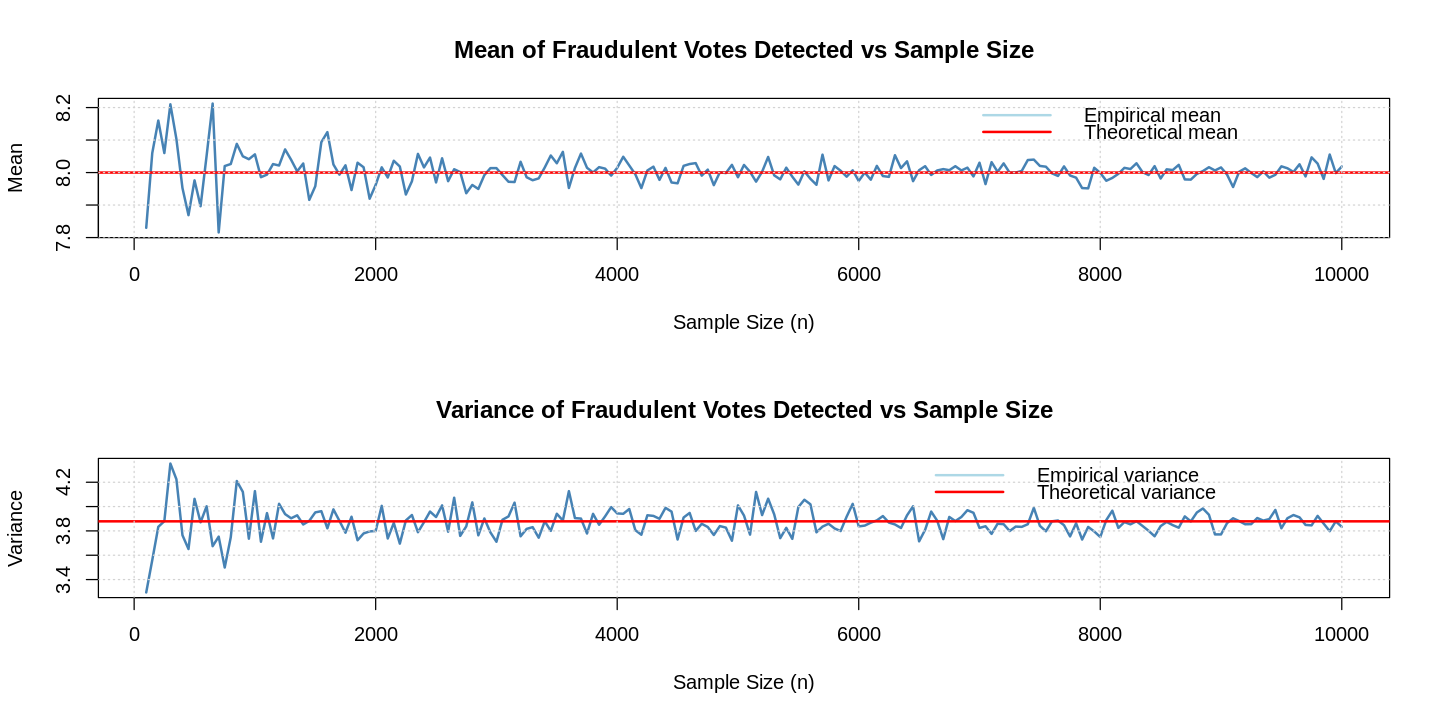

In [4]:
cat("Theoretical mean:", theoretical_mean, "\n")
cat("Theoretical variance:", theoretical_variance, "\n\n")

par(mfrow = c(2, 1), bg = "white")

plot(sample_trials, simulated_means, type = "l", col = "steelblue",
     ylab = "Mean", main = "Mean of Fraudulent Votes Detected vs Sample Size",
     xlab = "Sample Size (n)", ylim = range(simulated_means), lwd = 2)
abline(h = theoretical_mean, col = "red", lwd = 2)
legend("topright", legend = c("Empirical mean", "Theoretical mean"),
       col = c("lightblue", "red"), lwd = 2, bty = "n")
grid()

plot(sample_trials, simulated_variances, type = "l", col = "steelblue",
     ylab = "Variance", main = "Variance of Fraudulent Votes Detected vs Sample Size",
     xlab = "Sample Size (n)", ylim = range(simulated_variances), lwd = 2)
abline(h = theoretical_variance, col = "red", lwd = 2)
legend("topright", legend = c("Empirical variance", "Theoretical variance"),
       col = c("lightblue", "red"), lwd = 2, bty = "n")
grid()



*   The simulated values fluctuate around the theoretical values as the sample sizes increase.

*    With smaller sample sizes, there's noticeable variability in the simulated values due to higher sampling error.

*    As the sample size increases, the simulated value converge and stabilize around the theoretical value.

**Overall**, Both diagrams illustrate that the simulated means and variances become more consistent and closely match the theoretical values as the sample size increases, validating the accuracy of the hypergeometric distribution.

## Section 4:

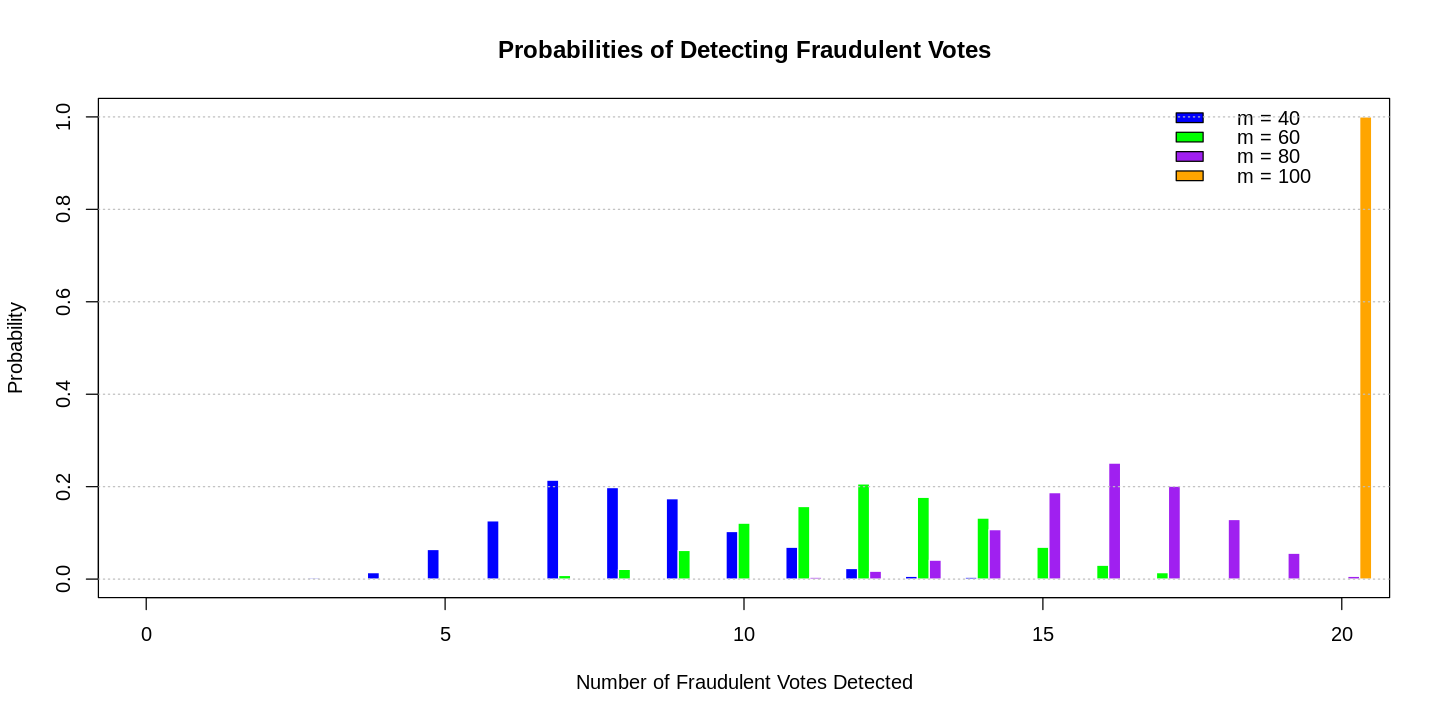

In [5]:
m_values <- c(40, 60, 80, 100)
num_trials <- 1000

par(bg = "white")
colors <- c("blue", "green", "purple", "orange")
width <- 0.2

plot(0, 0, type = "n", xlim = c(0, 20), ylim = c(0, 1),
     xlab = "Number of Fraudulent Votes Detected",
     ylab = "Probability",
     main = "Probabilities of Detecting Fraudulent Votes")

for (j in seq_along(m_values)) {
  m <- m_values[j]
  frauds_per_trial <- rhyper(num_trials, K, N - K, m)
  probabilities <- table(factor(frauds_per_trial, levels = 0:20)) / num_trials

  bar_positions <- 0:20 + (j - 1) * width - (width * (length(m_values) - 1)) / 2
  rect(bar_positions, 0, bar_positions + width, probabilities, col = colors[j], border = "white")
}

legend("topright", legend = paste("m =", m_values), fill = colors, bty = "n")
grid(nx = NA, ny = NULL, col = "gray", lty = "dotted")

* As the number of regions audited (𝑚) increases, the probability distribution becomes more dispersed.

* For smaller values of 𝑚, the distribution is more concentrated around lower numbers of detected fraudulent votes.

* For larger values of 𝑚 , the distribution spreads out more, increasing the likelihood of detecting a higher number of fraudulent votes.

The diagrams effectively demonstrate the relationship between the number of regions audited and the probability of detecting fraudulent votes. As 𝑚 increases, the likelihood of detecting more fraudulent votes also increases, confirming the theoretical expectation that larger sample sizes lead to better detections. For the last diagram, since all of the population is selected, the whole fraudulent votes will be in the selection leading to detecting all of them. so the probability of the detection will be 100%.

## Section 5:

In [ ]:
binomial_pmf <- function(n, p, X) {
  probabilities <- numeric(length(X))

  for (i in seq_along(X)) {
    x <- X[i]
    combinations <- choose(n, x)
    probability <- combinations * (p ^ x) * ((1 - p) ^ (n - x))
    probabilities[i] <- probability
  }

  return(probabilities)
}

hypergeometric_pmf <- function(N, K, n, X) {
  probabilities <- numeric(length(X))

  for (i in seq_along(X)) {
    x <- X[i]
    probability <- (choose(K, x) * choose(N - K, n - x)) / choose(N, n)
    probabilities[i] <- probability
  }

  return(probabilities)
}

## Section 6:

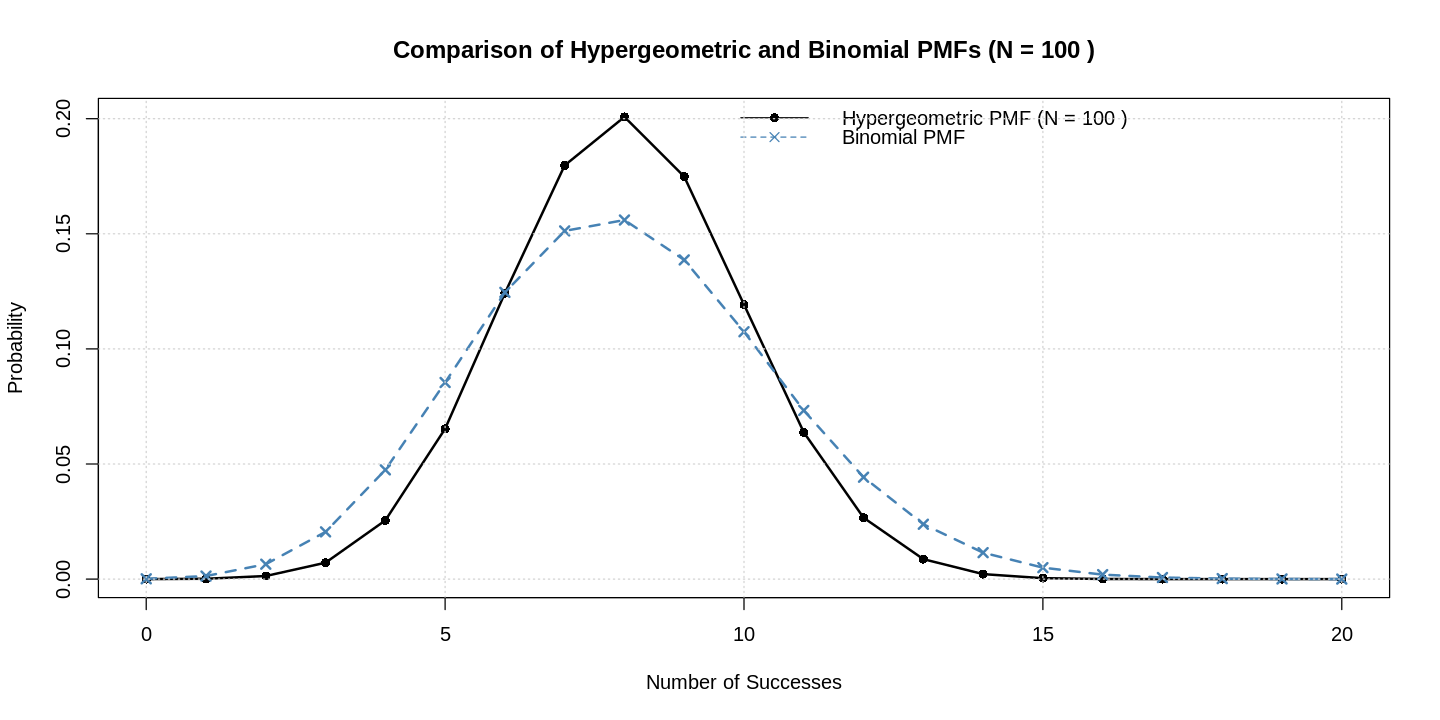

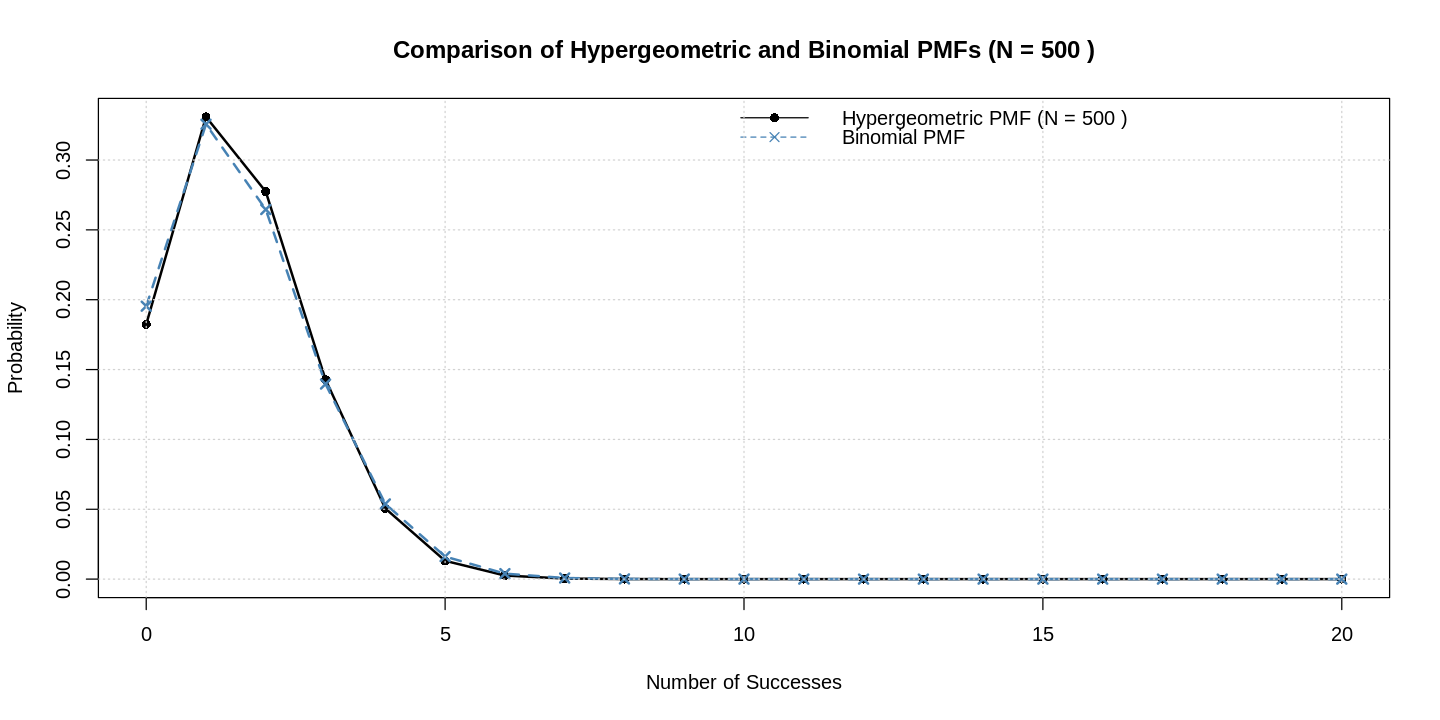

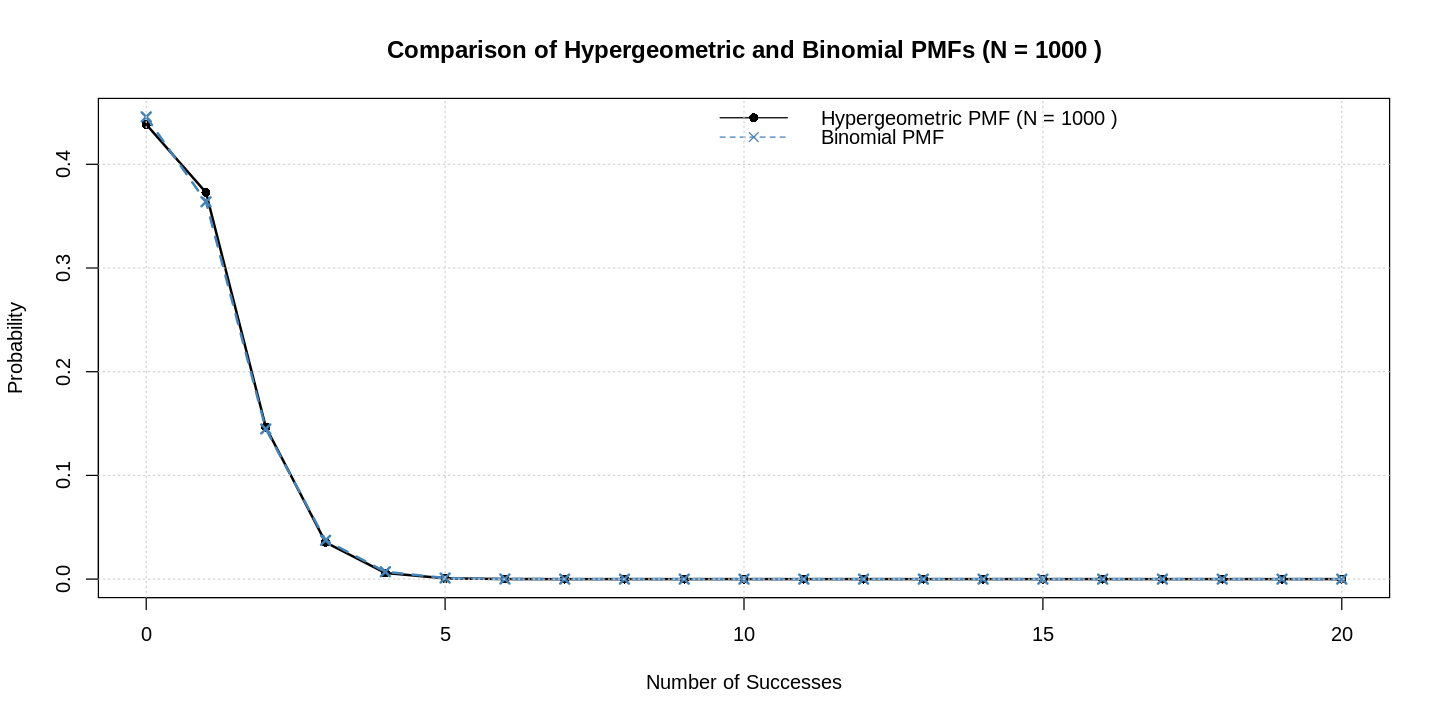

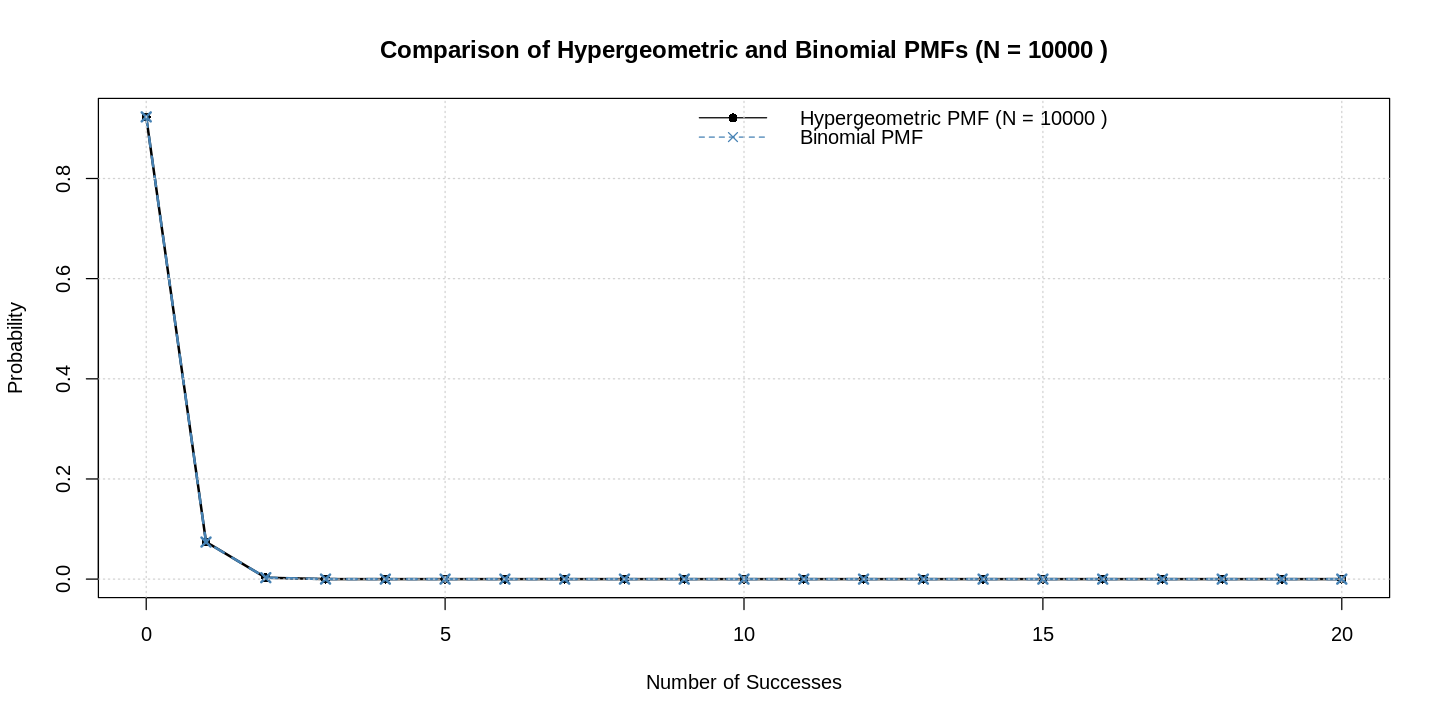

In [10]:
N <- c(100, 500, 1000, 10000)
K <- 20
n <- 40
X <- 0:20

for (total_population in N) {
  p <- K / total_population
  hypergeometricPMF <- hypergeometric_pmf(total_population, K, n, X)
  binomialPMF <- binomial_pmf(n, p, X)

  plot(X, hypergeometricPMF, type = 'o', col = 'black', pch = 16,
       xlab = 'Number of Successes', ylab = 'Probability',
       main = paste('Comparison of Hypergeometric and Binomial PMFs (N =', total_population, ')'),
       ylim = c(0, max(hypergeometricPMF, binomialPMF)), lwd = 2)
  lines(X, binomialPMF, type = 'o', col = 'steelblue', pch = 4, lty = 2, lwd = 2)

  legend("topright", legend = c(paste('Hypergeometric PMF (N =', total_population, ')'), 'Binomial PMF'),
         col = c('black', 'steelblue'), pch = c(16, 4), lty = c(1, 2), bty = 'n')
  grid()
}

## Section 7:

*   Hypergeometric Distribution: Used for sampling without replacement, where the probability of success changes with each draw as the population size decreases.

*    Binomial Distribution: Assumes sampling with replacement, where the probability of success remains constant across trials.

As 𝑁 increases, the effect of sampling without replacement in the Hypergeometric distribution becomes negligible. This is because the reduction in population size after each draw has a diminishing impact when the population is very large. Consequently, the Hypergeometric distribution approaches the Binomial distribution, which assumes an infinite population or constant probability of success.